In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
loan_status_data= pd.read_csv('loan data.csv')

In [3]:
loan_status_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_status_data.shape

(614, 13)

In [5]:
loan_status_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan_status_data.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


In [7]:
loan_status_data=loan_status_data.drop(columns='Loan_ID', axis=1)

In [8]:
loan_status_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
loan_status_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#dropping the missing values

loan_status_data= loan_status_data.dropna()
loan_status_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
loan_status_data.shape

(480, 12)

In [12]:
loan_status_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [13]:
loan_status_data= loan_status_data.replace(to_replace='3+', value=4)

<AxesSubplot:xlabel='Education', ylabel='count'>

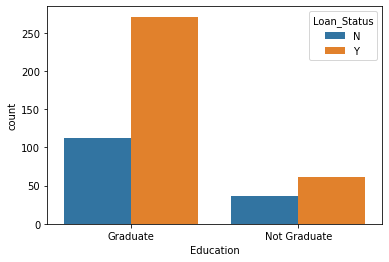

In [14]:
#data visualization

sns.countplot(x='Education', hue='Loan_Status', data=loan_status_data )


<AxesSubplot:xlabel='Married', ylabel='count'>

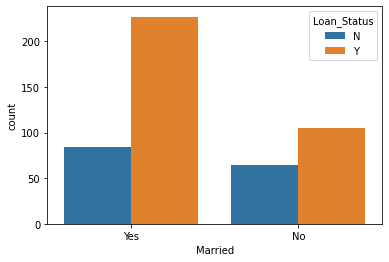

In [15]:
sns.countplot(x='Married', hue='Loan_Status', data=loan_status_data )

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

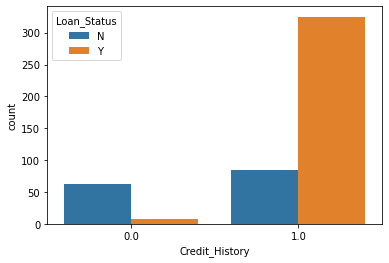

In [16]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan_status_data )

In [17]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
loan_status_data['Loan_Status']=le.fit_transform(loan_status_data['Loan_Status'])
loan_status_data['Gender']=le.fit_transform(loan_status_data['Gender'])
loan_status_data['Married']=le.fit_transform(loan_status_data['Married'])
loan_status_data['Education']=le.fit_transform(loan_status_data['Education'])
loan_status_data['Self_Employed']=le.fit_transform(loan_status_data['Self_Employed'])
loan_status_data['Property_Area']=le.fit_transform(loan_status_data['Property_Area'])
loan_status_data.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [18]:
loan_status_data['Property_Area'].value_counts()

1    191
2    150
0    139
Name: Property_Area, dtype: int64

In [19]:
x= loan_status_data.drop(columns='Loan_Status')
y= loan_status_data['Loan_Status']

In [20]:
Xtrain, Xtest, Ytrain, Ytest= train_test_split(x, y, test_size=0.1, stratify=y, random_state=2)

In [21]:
print('shape of Xtrain:', Xtrain.shape)
print('shape of Ytrain:', Ytrain.shape)
print('shape of Xtest:', Xtest.shape)
print('shape of Ytest:', Ytest.shape)

shape of Xtrain: (432, 11)
shape of Ytrain: (432,)
shape of Xtest: (48, 11)
shape of Ytest: (48,)


In [22]:
classifier= svm.SVC(kernel='linear')
classifier.fit(Xtrain, Ytrain)

SVC(kernel='linear')

In [23]:
ypred= classifier.predict(Xtest)

In [24]:
print('Accuracy of the model is:',accuracy_score(ypred, Ytest))

Accuracy of the model is: 0.8541666666666666
